# Why vAMM does not need a liquidity pool?

Perpetual Protocol’s vAMM uses the same $x*y=k$ constant product formula as Uniswap. One of the very difference between vAMM and AMM is that vAMM does not require a physical liquidity pool. Although the price is still discovered by the AMM curve, traders indeed store their collateral in a smart contract vault. Such mechanism arouses concerns about whether the vault is capable to meet the solvency demands at any time when traders are allowed to long and short in the protocol. Can vAMM still keep its path independency? This literature aims to simplify the solvency problem into several circumstances and prove that vAMM is capable of doing so.

# Solvency Model

This literature simplifies the market model with only two components, A and B. Both A and B would either long or short the underlying asset. The chronological order of entering or clearing their position always follows that A goes first and B goes second.

In the real world, the solvency of vAMM can be regarded as a multiplication of trading pairs. So if this model can be proved valid in a dual-system, then vAMM can ensure solvency in the real market. The solvency procedure is classified into several catagories. This literature will then prove the solvency of vAMM under each circumstance.

# Notation

Before deriving model, it is essential to clarify the notation used in this literature:


\begin{itemize}
    \item \textbf{x:} the quote currency, usually referred as an asset, e.g ETH
    \item \textbf{y:} the quote currency, e.g USDC
    \item \textbf{$\Delta A$:} the notional amount of investor A
    \item \textbf{$\Delta B$:} the notional amount of investor B
    \item \textbf{$x_i$:} the ith step of $x$ during the solvency
    \item \textbf{$y_i$:} the ith step of $y$ during the solvency
    \item \textbf{$\Delta x_i$:} the absolute change of $x$ after the ith step is launched
    \item \textbf{$\Delta y_i$:} the absolute change of $y$ after the ith step is launched
    \item \textbf{$g_A$:} A's capital gain after clearing his position 
    \item \textbf{$g_B$:} B's capital gain after clearing his position
\end{itemize}



# Derivation

## A long, B long ($\Delta A \lt \Delta B$)


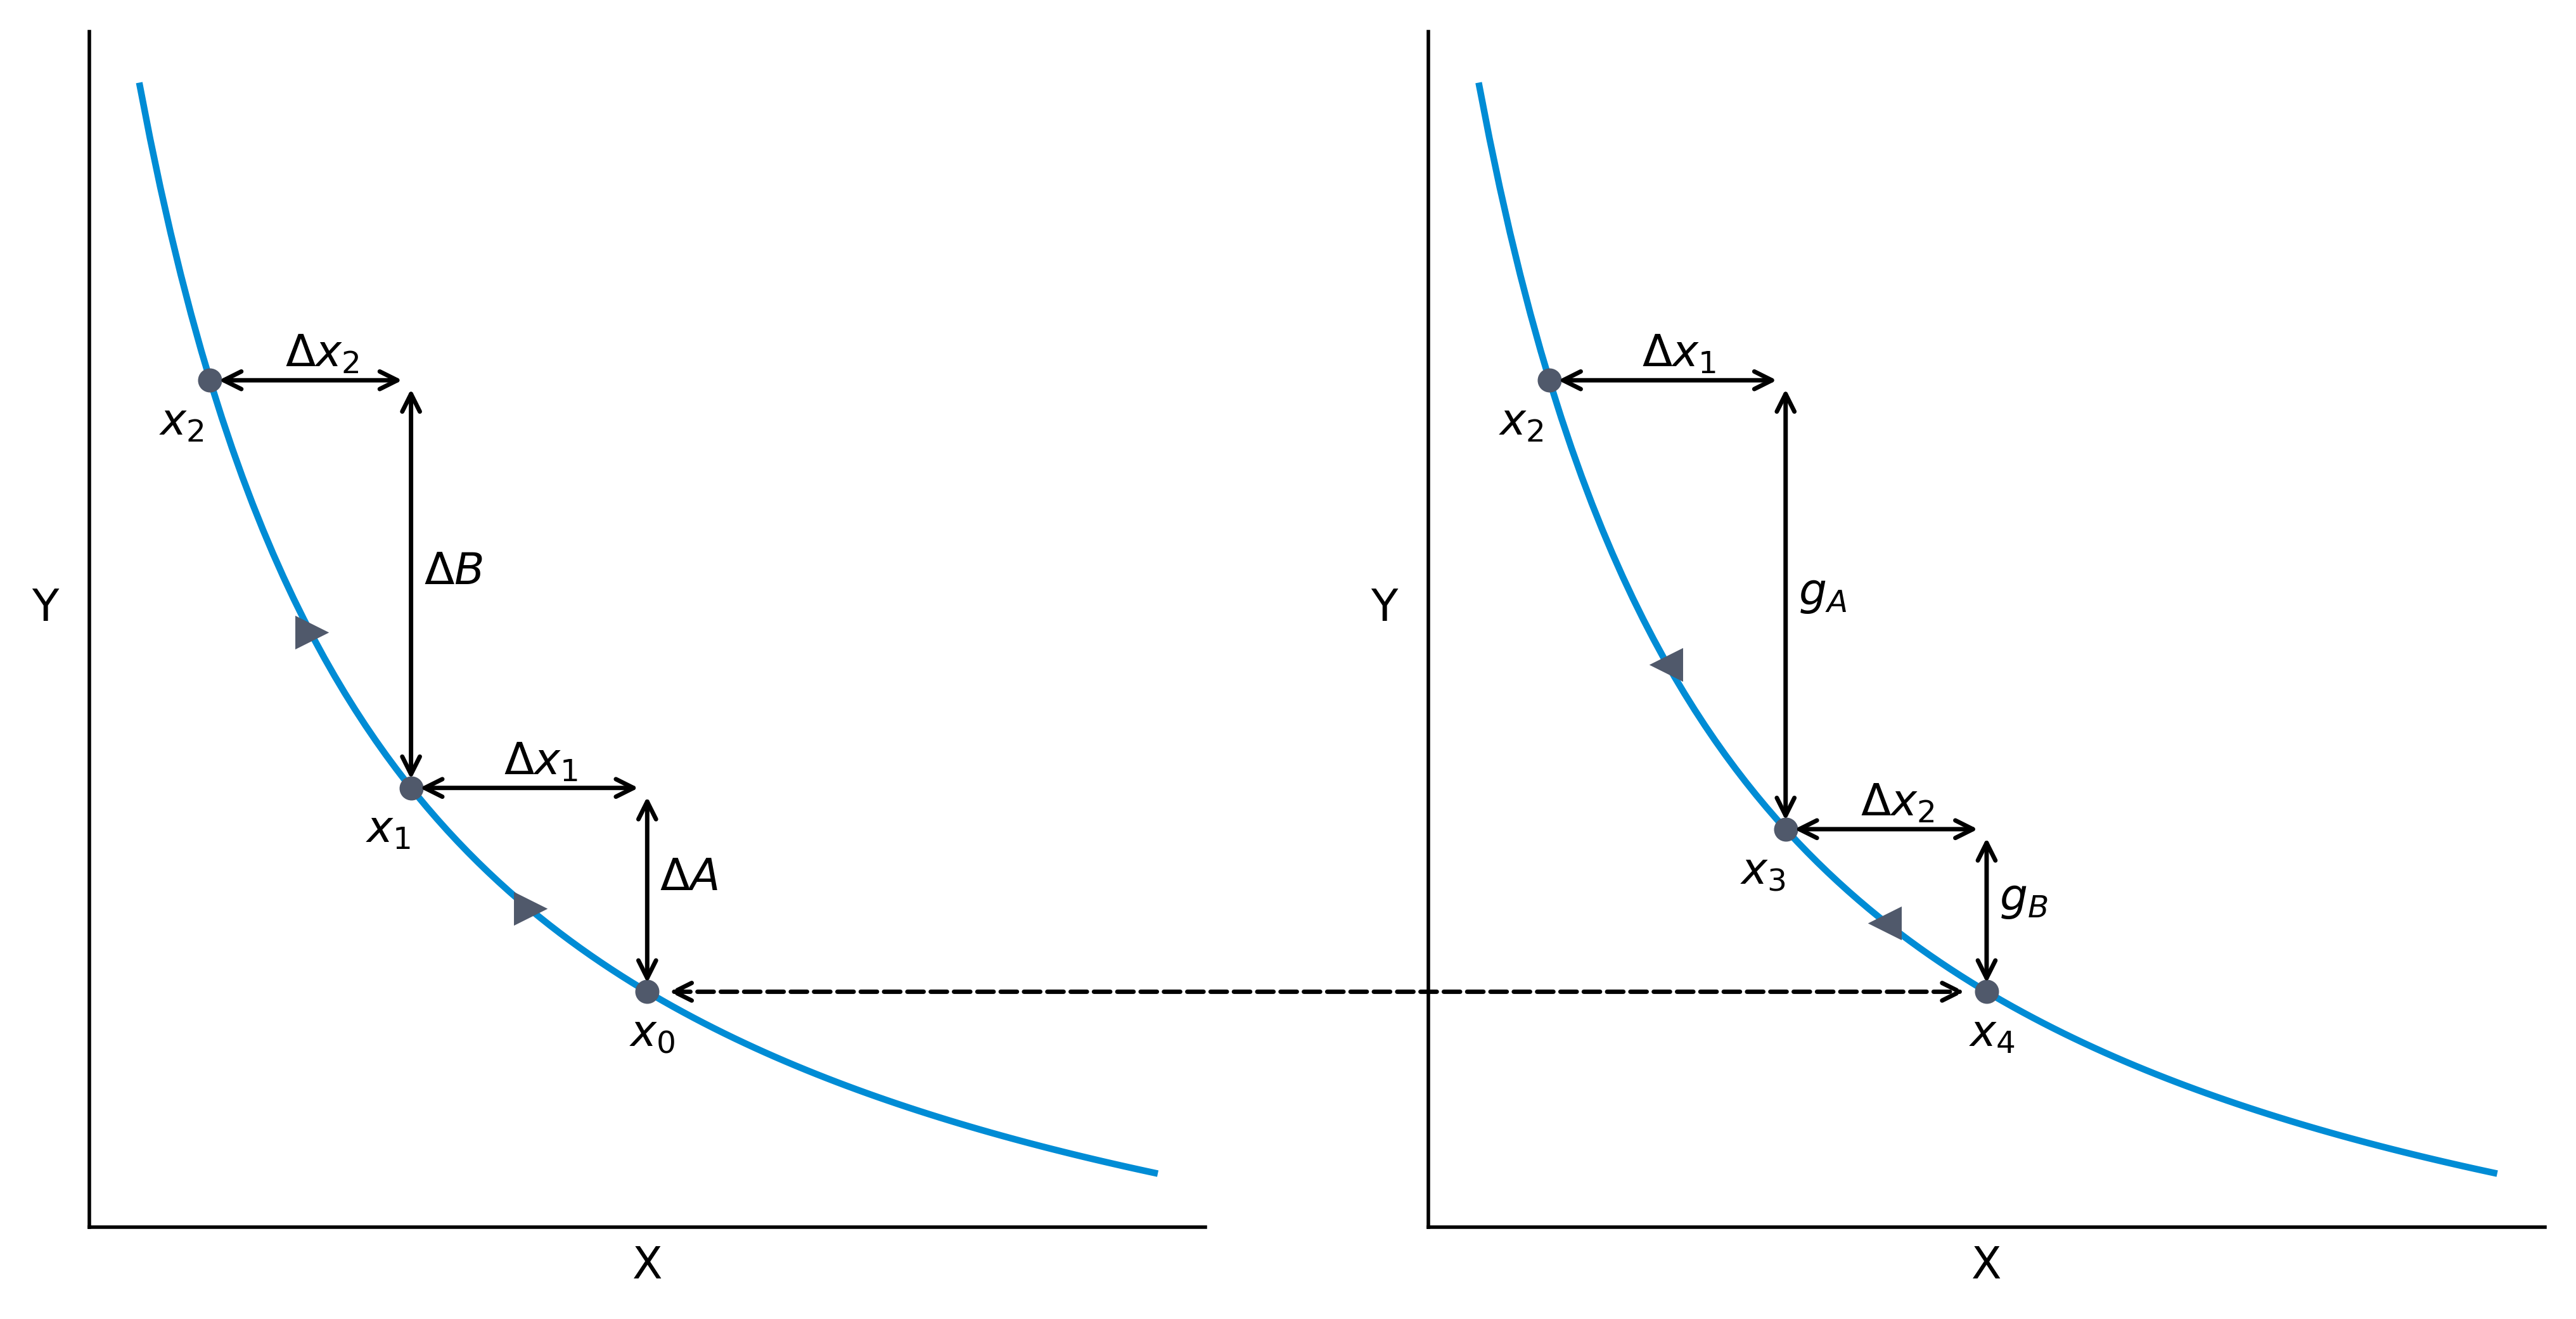

In [5]:
# %matplotlib notebook
from mpl_toolkits.axisartist.axislines import SubplotZero
from matplotlib.patches import ConnectionPatch
from matplotlib.patches import ArrowStyle
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 500

# from traitlets.config import Config
# import nbformat as nbf
# from nbconvert.exporters import HTMLExporter

# c = Config()
# c.TagRemovePreprocessor.remove_input_tags = ('remove_input',)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

k = 10000
x_curve = np.linspace(100,500,100)
y_curve = k/x_curve
x0 = 300
y0 = k/x0
dA = 15
dB = dA*2
y1 = y0+dA
x1 = k/y1
dx1 = x0-x1
y2 = y1+dB
x2 = k/y2
dx2 = x1-x2

#ax.plot(x_curve,y_curve)

# for direction in ["xzero", "yzero"]:
#     # adds arrows at the ends of each axis
#     ax.axis[direction].set_axisline_style("-|>")

#     # adds X and Y-axis from the origin
#     ax.axis[direction].set_visible(True)

for ax in (ax1,ax2):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
    ax.set_xlabel('X')
    ax.set_ylabel('Y',rotation='horizontal',labelpad=10)
    ax.plot(x_curve,y_curve,color='#008CD5')


ax1.annotate("",
            xy=(x0, y0), xycoords='data',
            xytext=(x0, y1), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3")
            )
ax1.annotate(r'$\Delta A$',
            xy=(x0+5, (y0+y1)/2), xycoords='data',
            )

ax1.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x1, y2), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3")
            )
ax1.annotate(r'$\Delta B$',
            xy=(x1+5, (y2+y1)/2), xycoords='data',
            )

ax1.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x0, y1), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3")
            )
ax1.annotate(r'$\Delta x_{1}$',
            xy=((x0+x1)/2-10, y1+1), xycoords='data',
            )
ax1.annotate("",
            xy=(x2, y2), xycoords='data',
            xytext=(x1, y2), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3")
            )
ax1.annotate(r'$\Delta x_{2}$',
            xy=((x2+x1)/2-10, y2+1)
            )

ax1.annotate(r'$x_0$',
            xy=(x0-7, y0-4)
            )

ax1.annotate(r'$x_1$',
            xy=(x1-18, y1-4)
            )

ax1.annotate(r'$x_2$',
            xy=(x2-20, y2-4)
            )

ax1.scatter([x0],[y0],s = 20,color='#50596B', zorder=3)
ax1.scatter([x1],[y1],s = 20,color='#50596B', zorder=3)
ax1.scatter([x2],[y2],s = 20,color='#50596B', zorder=3)

ax1.plot([(x0+x1)/2],[2*k/(x0+x1)],'k>',color='#50596B', zorder=3)
ax1.plot([(x2+x1)/2],[2*k/(x2+x1)],'k>',color='#50596B', zorder=3)
# ax.hlines(y1,xmin=x1,xmax=x0,color='#50596B',linestyles='dashed')
# ax.hlines(y2,xmin=x2,xmax=x0,color='#50596B',linestyles='dashed')

x3 = x2+dx1
y3 = k/x3
x4 = x3+dx2
y4 = k/x4


ax2.annotate("",
            xy=(x2, y2), xycoords='data',
            xytext=(x3, y2), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3")
            )
ax2.annotate(r'$\Delta x_{1}$',
            xy=((x2+x3)/2-10, y2+1), xycoords='data',
            )

ax2.annotate("",
            xy=(x3, y3), xycoords='data',
            xytext=(x3, y2), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3")
            )
ax2.annotate(r'$g_A$',
            xy=(x3+5, (y2+y3)/2), xycoords='data',
            )

ax2.annotate("",
            xy=(x3, y3), xycoords='data',
            xytext=(x4, y3), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3")
            )
ax2.annotate(r'$\Delta x_{2}$',
            xy=((x3+x4)/2-10, y3+1), xycoords='data',
            )
ax2.annotate("",
            xy=(x4, y4), xycoords='data',
            xytext=(x4, y3), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3")
            )
ax2.annotate(r'$g_B$',
            xy=(x4+5, (y4+y3)/2)
            )

ax2.annotate(r'$x_2$',
            xy=(x2-20, y2-4)
            )

ax2.annotate(r'$x_3$',
            xy=(x3-18, y3-4)
            )

ax2.annotate(r'$x_4$',
            xy=(x4-7, y4-4)
            )

ax2.scatter([x2],[y2],s = 20,color='#50596B', zorder=3)
ax2.scatter([x3],[y3],s = 20,color='#50596B', zorder=3)
ax2.scatter([x4],[y4],s = 20,color='#50596B', zorder=3)

ax2.plot([(x2+x3)/2],[2*k/(x2+x3)],'k<',color='#50596B', zorder=3)
ax2.plot([(x3+x4)/2],[2*k/(x3+x4)],'k<',color='#50596B', zorder=3)

con = ConnectionPatch(
    xyA=(x0,y0), coordsA=ax1.transData,
    xyB=(x4,y4), coordsB=ax2.transData,
    arrowstyle="<->",linestyle="dashed",
    shrinkA=5,shrinkB=5)
fig.add_artist(con)

plt.show()

\textbf{Procedure:} 
\begin{itemize}
    \item \textit{The creator} can set an initial amount of $x$ and $y$ on vAMM, respectively with volume $x_0$ and $y_0$.
    \item \textit{Investor A}  wants to long the underlying asset $x$ with a certain ratio of leverage. The protocol thus credits $\Delta A$ from \textit{Investor A} to the vAMM. In the meantime, we can calculate the amount of $x$ that \textit{Investor A} receives from the protocol. In this step, $x_0$ moves to $x_1$.
    \item \textit{Investor B} also wants to long the underlying asset $x$. The protocol thus credits $\Delta B$ from \textit{Investor B} to the vAMM. In the meantime, the amount of $x$ that \textit{Investor B} receives could be discovered. In this step, $x_1$ moves to $x_2$.
    \item \textit{Investor A} decides to clear his position and receives $g_A$ from the protocol. So $x_2$ moves to $x_3$. 
    \item Finally, \textit{Investor B} clears his position and receives $g_B$ from the protocol. $x_3$ moves to $x_4$ and the trading ends. 
\end{itemize}

\textbf{The equation system goes as follows:}
\begin{align}
(x_0-\Delta x_1)(y_0+\Delta A)&=k \\
(x_1-\Delta x_2)(y_1+\Delta B)&=k \\
(x_2+\Delta x_1)(y_2-g_A)&=k \\
(x_3+\Delta x_2)(y_3-g_B)&=k 
\end{align}

\textbf{Conclusion:}
\begin{itemize}
    \item From the plot, it is easy to find $g_A+g_B=\Delta A +\Delta B$. Thus, $g_A-\Delta A= \Delta B -g_B$. A's gain covers B's loss. So the vault always has enough collateral to pay back every trader under this circumstance.
    \item And so forth， it's easy to deduce that one trader's gain will cancel out another trader's loss when A short and B short, no matter the size of their notional.
\end{itemize}


## A long, B short ($\Delta A \gt \Delta B$)

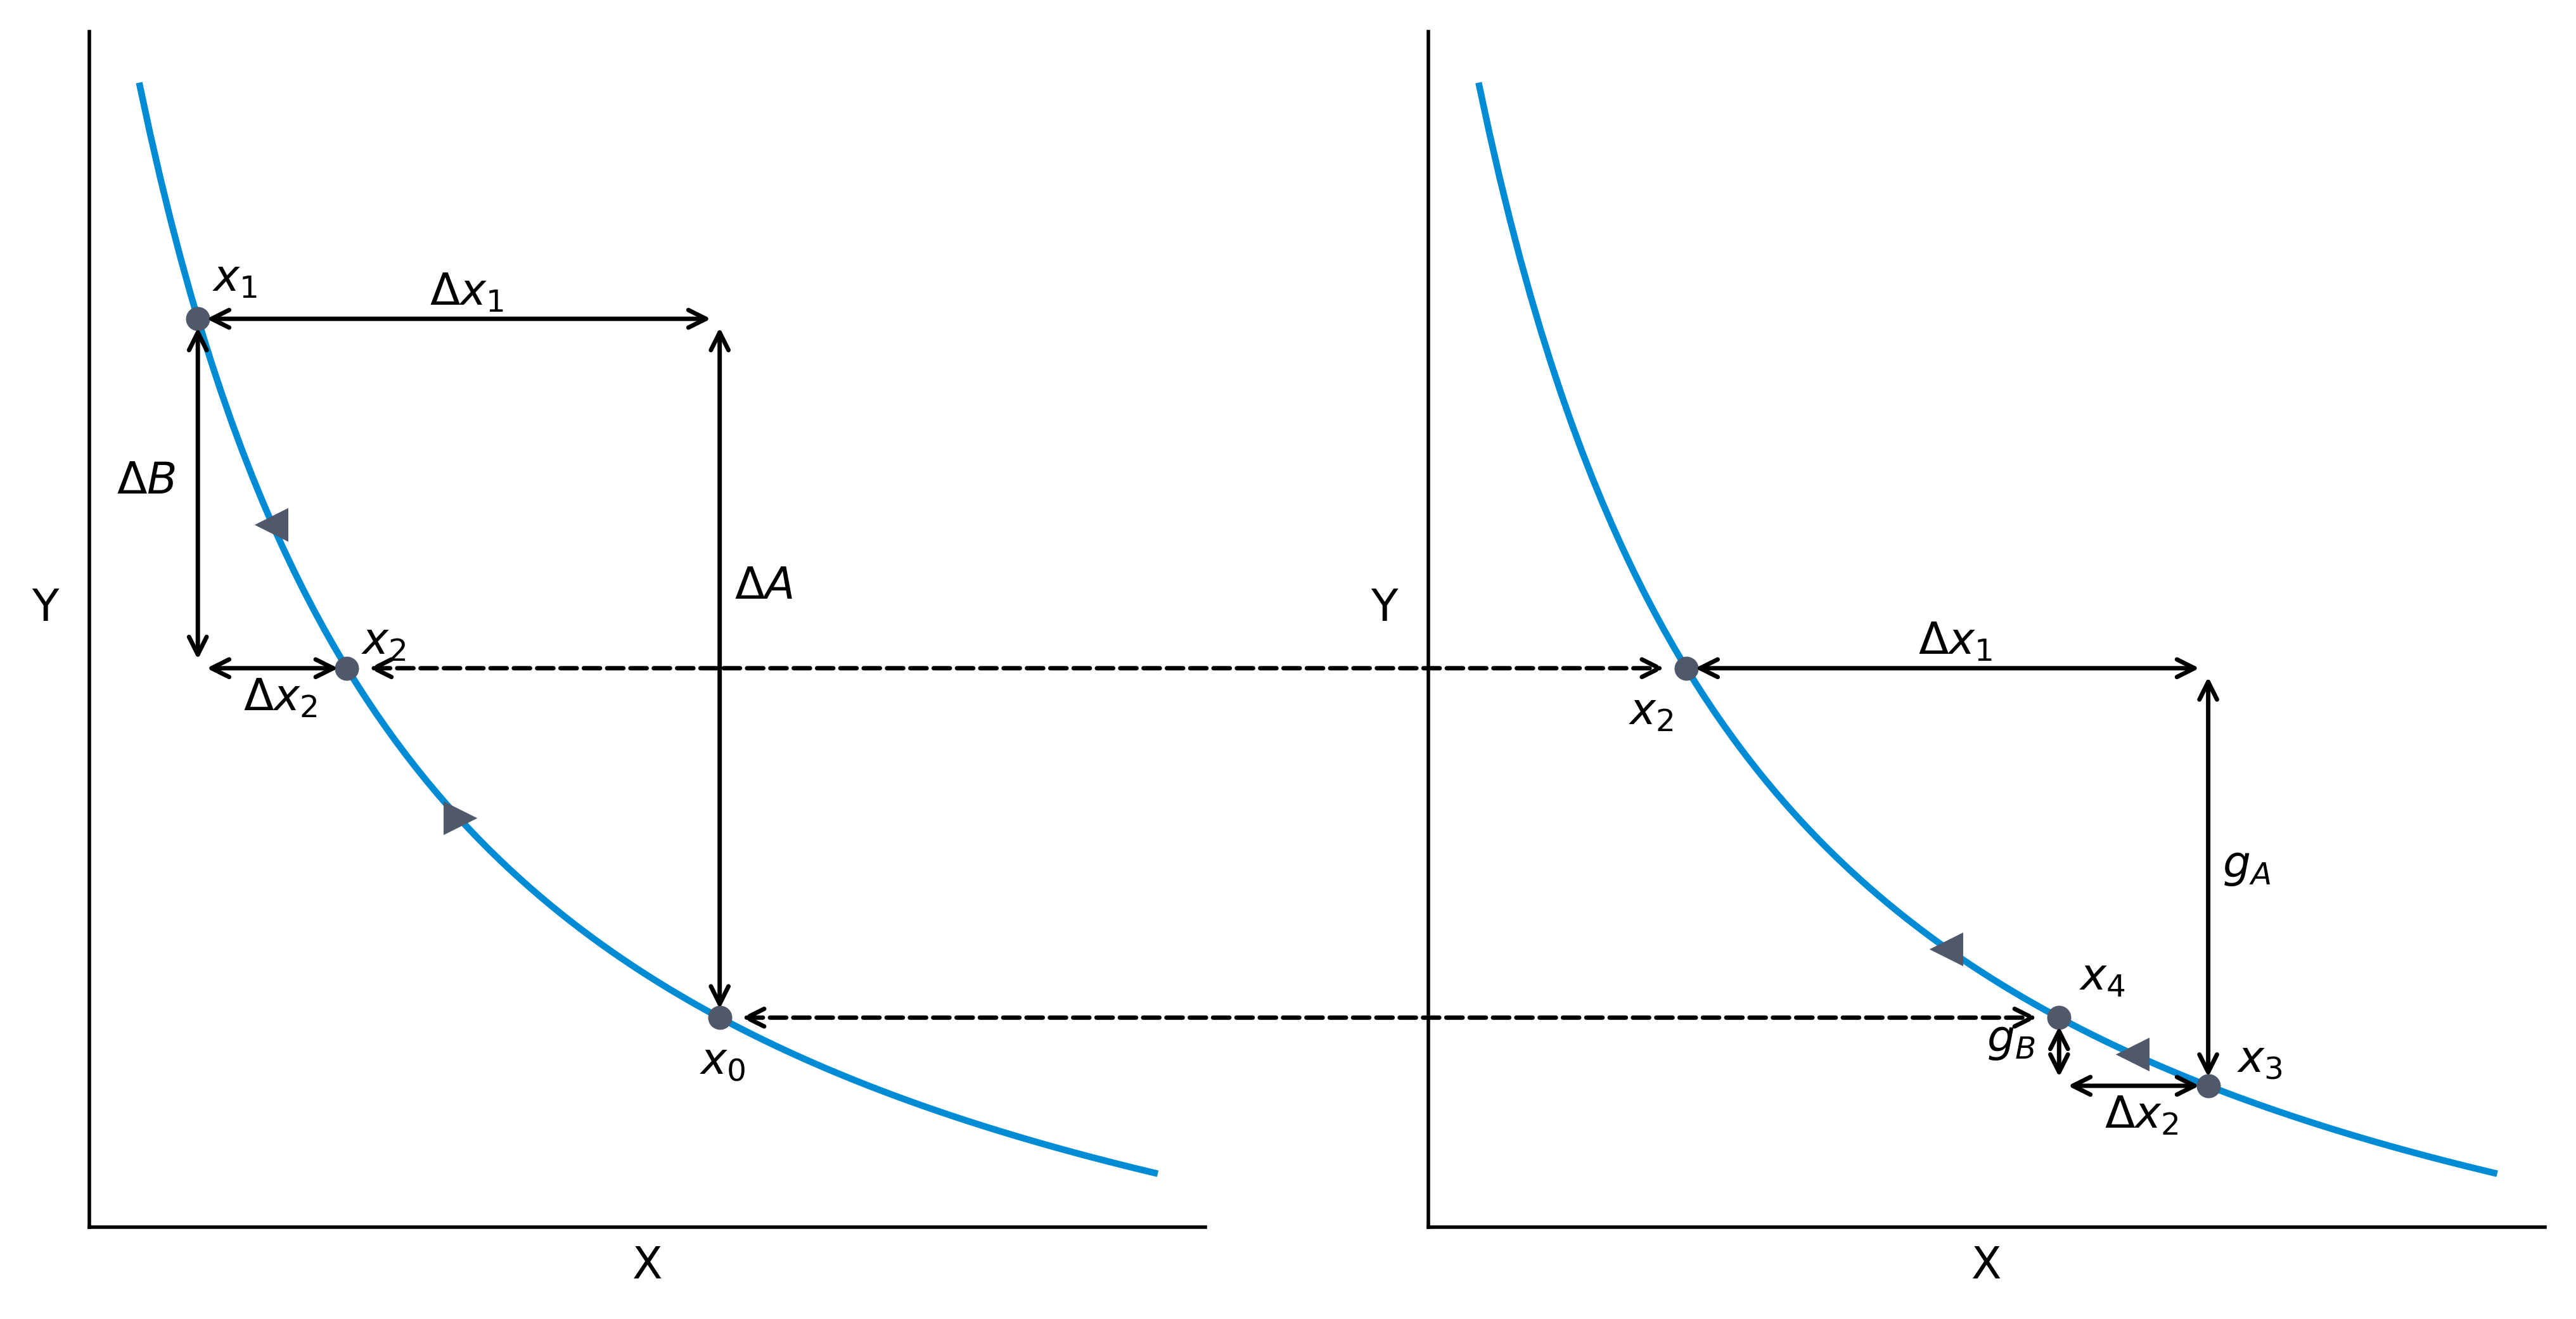

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

k = 10000
x_curve = np.linspace(100,450,100)
y_curve = k/x_curve
x0 = 300
y0 = k/x0
dA = 50
dB = dA/2
y1 = y0+dA
x1 = k/y1
dx1 = x0-x1
y2 = y1-dB
x2 = k/y2
dx2 = x2-x1

#ax.plot(x_curve,y_curve)

# for direction in ["xzero", "yzero"]:
#     # adds arrows at the ends of each axis
#     ax.axis[direction].set_axisline_style("-|>")

#     # adds X and Y-axis from the origin
#     ax.axis[direction].set_visible(True)

for ax in (ax1,ax2):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
    ax.set_xlabel('X')
    ax.set_ylabel('Y',rotation='horizontal',labelpad=10)
    ax.plot(x_curve,y_curve,color='#008CD5')


ax1.annotate("",
            xy=(x0, y0), xycoords='data',
            xytext=(x0, y1), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3")
            )
ax1.annotate(r'$\Delta A$',
            xy=(x0+5, (y0+y1)/2+5), xycoords='data',
            )

ax1.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x1, y2), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3")
            )
ax1.annotate(r'$\Delta B$',
            xy=(x1-28, (y2+y1)/2), xycoords='data',
            )

ax1.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x0, y1), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3")
            )
ax1.annotate(r'$\Delta x_{1}$',
            xy=((x0+x1)/2-10, y1+1), xycoords='data',
            )
ax1.annotate("",
            xy=(x2, y2), xycoords='data',
            xytext=(x1, y2), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3")
            )
ax1.annotate(r'$\Delta x_{2}$',
            xy=((x2+x1)/2-10, y2-3)
            )

ax1.annotate(r'$x_0$',
            xy=(x0-7, y0-4)
            )

ax1.annotate(r'$x_1$',
            xy=(x1+5, y1+2)
            )

ax1.annotate(r'$x_2$',
            xy=(x2+5, y2+1)
            )

ax1.scatter([x0],[y0],s = 20,color='#50596B', zorder=3)
ax1.scatter([x1],[y1],s = 20,color='#50596B', zorder=3)
ax1.scatter([x2],[y2],s = 20,color='#50596B', zorder=3)

ax1.plot([(x0+x1)/2],[2*k/(x0+x1)],'k>',color='#50596B', zorder=3)
ax1.plot([(x2+x1)/2],[2*k/(x2+x1)],'k<',color='#50596B', zorder=3)
# ax.hlines(y1,xmin=x1,xmax=x0,color='#50596B',linestyles='dashed')
# ax.hlines(y2,xmin=x2,xmax=x0,color='#50596B',linestyles='dashed')

x3 = x2+dx1
y3 = k/x3
x4 = x3-dx2
y4 = k/x4


ax2.annotate("",
            xy=(x2, y2), xycoords='data',
            xytext=(x3, y2), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3")
            )
ax2.annotate(r'$\Delta x_{1}$',
            xy=((x2+x3)/2-10, y2+1), xycoords='data',
            )

ax2.annotate("",
            xy=(x3, y3), xycoords='data',
            xytext=(x3, y2), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3")
            )
ax2.annotate(r'$g_A$',
            xy=(x3+5, (y2+y3)/2), xycoords='data',
            )

ax2.annotate("",
            xy=(x3, y3), xycoords='data',
            xytext=(x4, y3), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3")
            )
ax2.annotate(r'$\Delta x_{2}$',
            xy=((x3+x4)/2-10, y3-3), xycoords='data',
            )
ax2.annotate("",
            xy=(x4, y4), xycoords='data',
            xytext=(x4, y3), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3")
            )
ax2.annotate(r'$g_B$',
            xy=(x4-25, (y4+y3)/2)
            )

ax2.annotate(r'$x_2$',
            xy=(x2-20, y2-4)
            )

ax2.annotate(r'$x_3$',
            xy=(x3+10, y3+1)
            )

ax2.annotate(r'$x_4$',
            xy=(x4+7, y4+2)
            )

ax2.scatter([x2],[y2],s = 20,color='#50596B', zorder=3)
ax2.scatter([x3],[y3],s = 20,color='#50596B', zorder=3)
ax2.scatter([x4],[y4],s = 20,color='#50596B', zorder=3)

ax2.plot([(x2+x3)/2],[2*k/(x2+x3)],'k<',color='#50596B', zorder=3)
ax2.plot([(x3+x4)/2],[2*k/(x3+x4)],'k<',color='#50596B', zorder=3)

con1 = ConnectionPatch(
    xyA=(x0,y0), coordsA=ax1.transData,
    xyB=(x4,y4), coordsB=ax2.transData,
    arrowstyle="<->",linestyle="dashed",
    shrinkA=5,shrinkB=5)

con2 = ConnectionPatch(
    xyA=(x2,y2), coordsA=ax1.transData,
    xyB=(x2,y2), coordsB=ax2.transData,
    arrowstyle="<->",linestyle="dashed",
    shrinkA=5,shrinkB=5)
fig.add_artist(con1)
fig.add_artist(con2)
plt.show()

\textbf{Procedure:} 
\begin{itemize}
    \item \textit{The creator} can set an initial amount of $x$ and $y$ on vAMM, respectively with volume $x_0$ and $y_0$.
    \item \textit{Investor A}  wants to long the underlying asset $x$ with a certain ratio of leverage. The protocol thus credits $\Delta A$ from \textit{Investor A} to the vAMM. In the meantime, we can calculate the amount of $x$ that \textit{Investor A} receives from the protocol. In this step, $x_0$ moves to $x_1$.
    \item \textit{Investor B} wants to short the underlying asset $x$. The protocol thus credits $-\Delta B$ from \textit{Investor B} to the vAMM. In the meantime, the amount of $x$ that \textit{Investor B} shorts could be discovered. In this step, $x_1$ moves to $x_2$.
    \item \textit{Investor A} decides to clear his position and receives $g_A$ from the protocol. So $x_2$ moves to $x_3$. 
    \item Finally, \textit{Investor B} clears his position and redelivers $\Delta x_2$ unit of $x$ to the protocol. $x_3$ moves to $x_4$ and the trading ends. 
\end{itemize}

\textbf{The equation system goes as follows:}
\begin{align}
(x_0-\Delta x_1)(y_0+\Delta A)&=k \\
(x_1+\Delta x_2)(y_1-\Delta B)&=k \\
(x_2+\Delta x_1)(y_2-g_A)&=k \\
(x_3-\Delta x_2)(y_3+g_B)&=k 
\end{align}

\textbf{Conclusion:}
\begin{itemize}
    \item From the plot, it is easy to find $g_A-\Delta A= \Delta B -g_B$. A's loss is covered by B's profit. So the vault always has enough collateral to pay back every trader under this circumstance.
    \item And so forth， it's easy to deduce that one trader's gain will cancel out another trader's loss when $\Delta A \lt \Delta B$.
\end{itemize}

## A short, B long($\Delta A \gt \Delta B$)

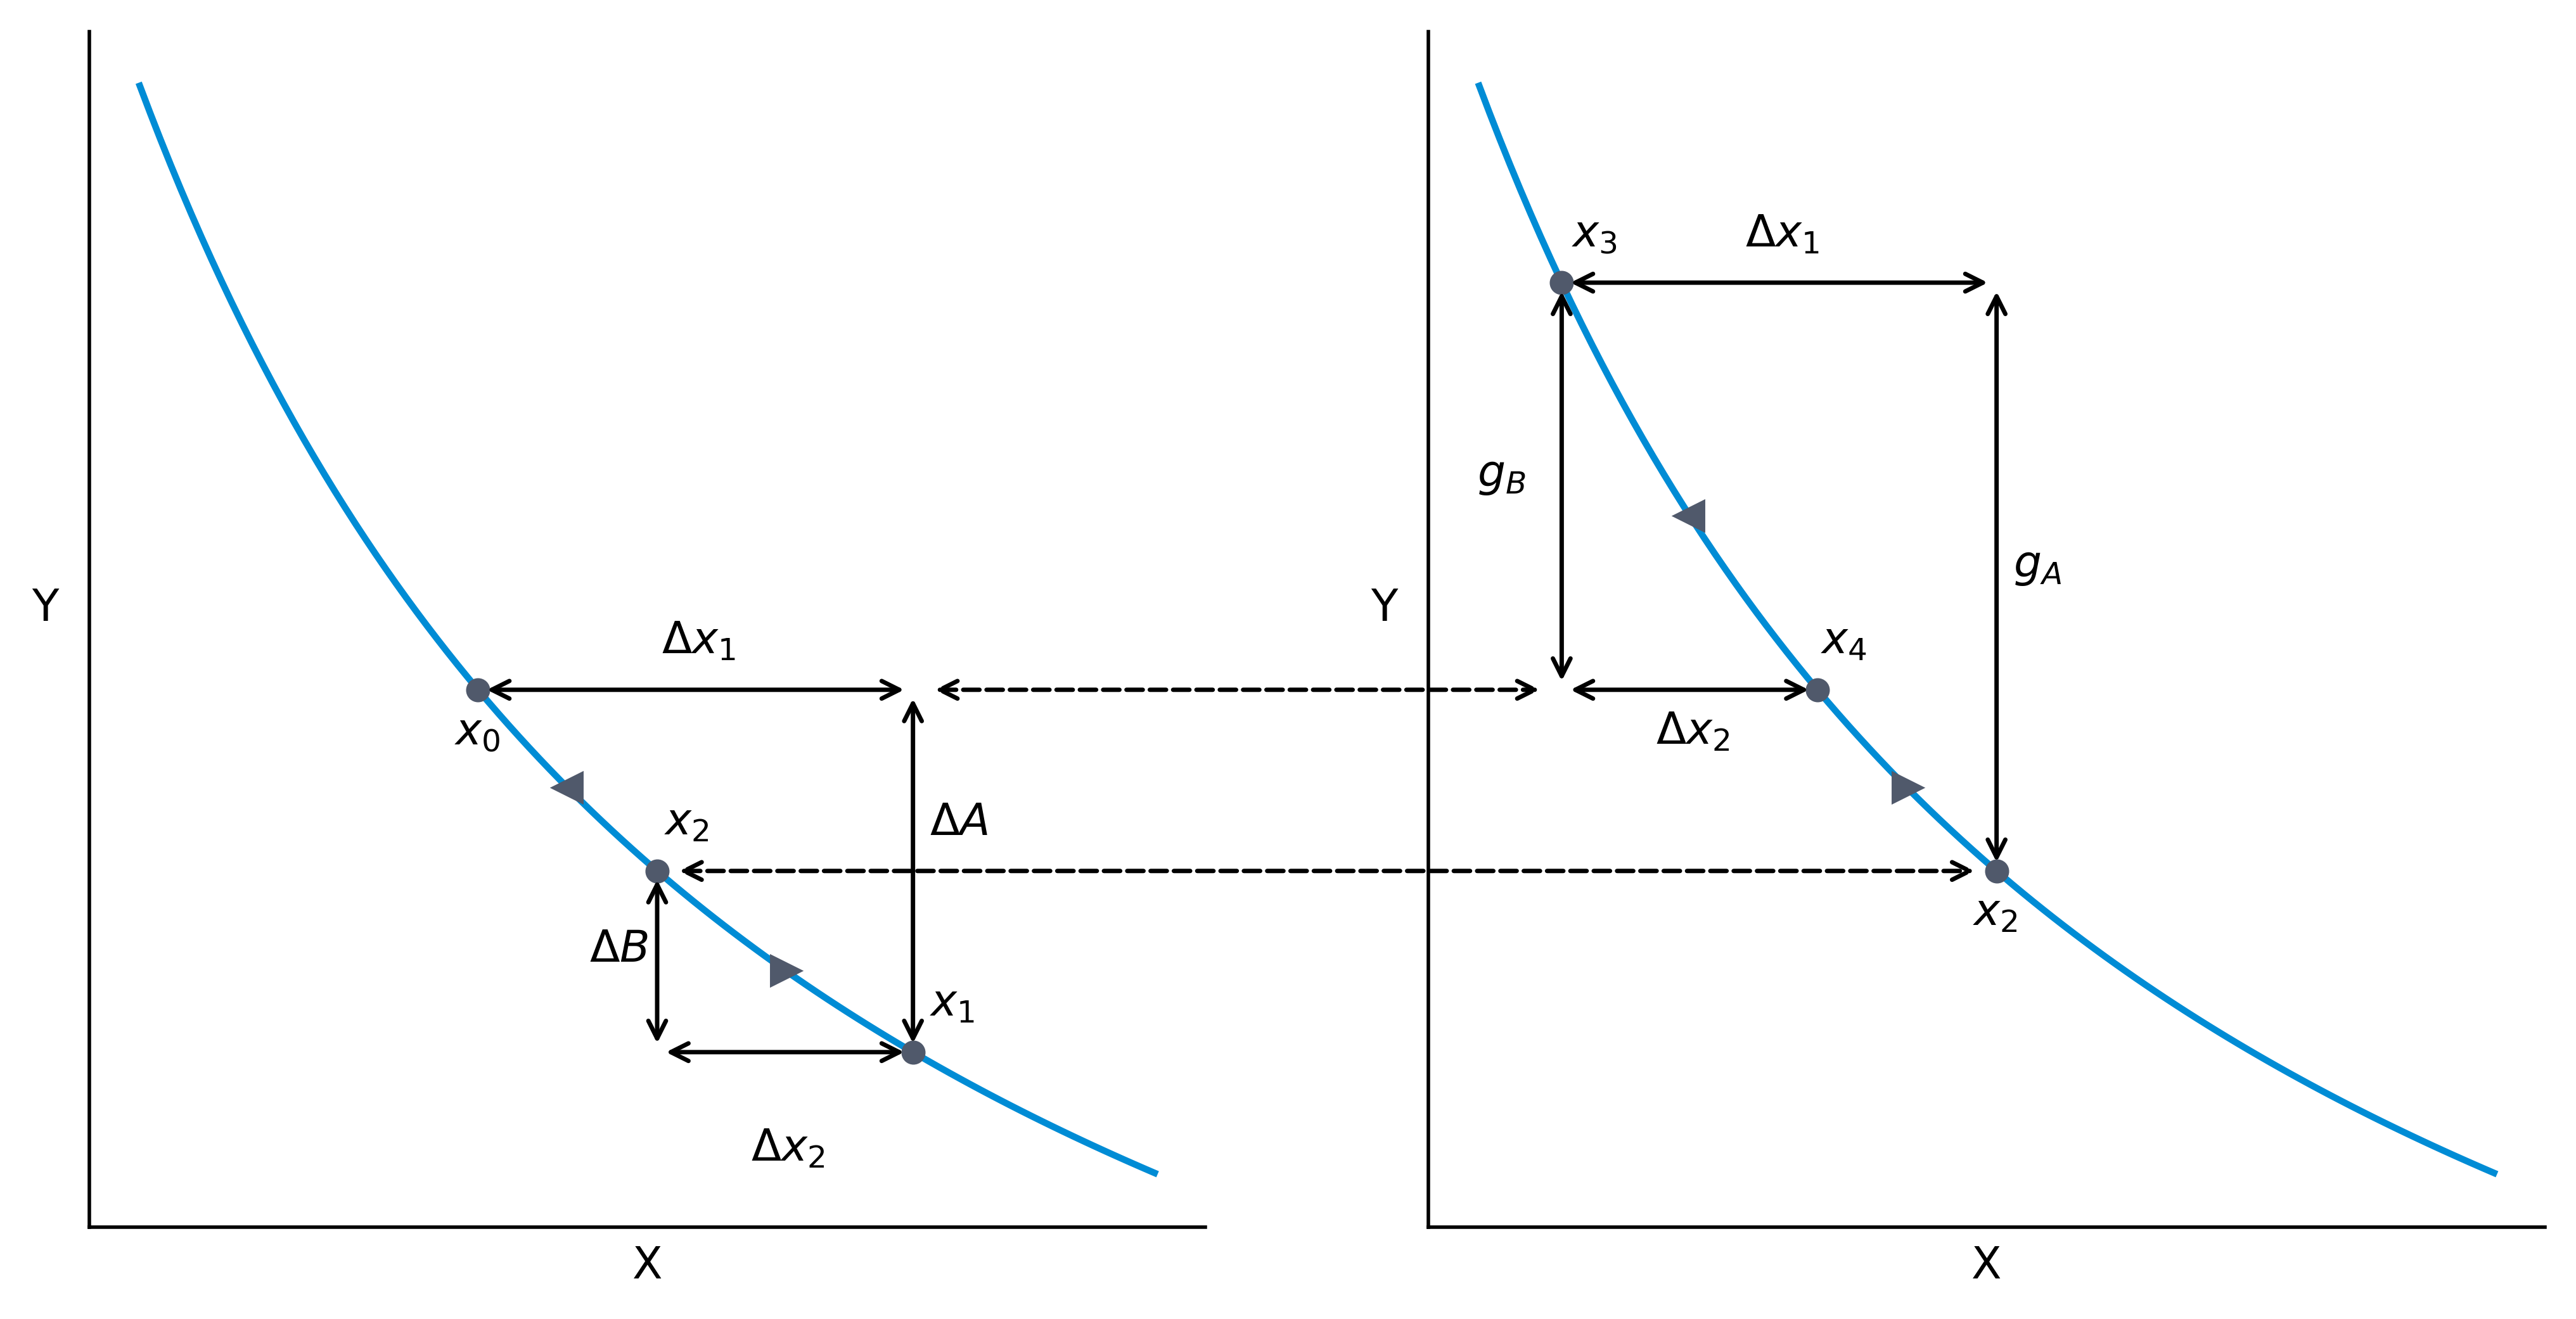

In [86]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

k = 10000
x_curve = np.linspace(200,500,100)
y_curve = k/x_curve
x0 = 300
y0 = k/x0
dA = 10
dB = dA/2
y1 = y0-dA
x1 = k/y1
dx1 = x1-x0
y2 = y1+dB
x2 = k/y2
dx2 = x1-x2

#ax.plot(x_curve,y_curve)

# for direction in ["xzero", "yzero"]:
#     # adds arrows at the ends of each axis
#     ax.axis[direction].set_axisline_style("-|>")

#     # adds X and Y-axis from the origin
#     ax.axis[direction].set_visible(True)

for ax in (ax1,ax2):
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
    ax.set_xlabel('X')
    ax.set_ylabel('Y',rotation='horizontal',labelpad=10)
    ax.plot(x_curve,y_curve,color='#008CD5')


ax1.annotate("",
            xy=(x1, y0), xycoords='data',
            xytext=(x1, y1), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3")
            )
ax1.annotate(r'$\Delta A$',
            xy=(x1+5, (y0+y1)/2+1), xycoords='data',
            )

ax1.annotate("",
            xy=(x2, y1), xycoords='data',
            xytext=(x2, y2), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3")
            )
ax1.annotate(r'$\Delta B$',
            xy=(x2-20, (y2+y1)/2), xycoords='data',
            )

ax1.annotate("",
            xy=(x0, y0), xycoords='data',
            xytext=(x1, y0), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3")
            )
ax1.annotate(r'$\Delta x_{1}$',
            xy=((x0+x1)/2-10, y0+1), xycoords='data',
            )
ax1.annotate("",
            xy=(x2, y1), xycoords='data',
            xytext=(x1, y1), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3")
            )
ax1.annotate(r'$\Delta x_{2}$',
            xy=((x2+x1)/2-10, y1-3)
            )

ax1.annotate(r'$x_0$',
            xy=(x0-7, y0-1.5)
            )

ax1.annotate(r'$x_1$',
            xy=(x1+5, y1+1)
            )

ax1.annotate(r'$x_2$',
            xy=(x2+2, y2+1)
            )

ax1.scatter([x0],[y0],s = 20,color='#50596B', zorder=3)
ax1.scatter([x1],[y1],s = 20,color='#50596B', zorder=3)
ax1.scatter([x2],[y2],s = 20,color='#50596B', zorder=3)

ax1.plot([(x0+x2)/2],[2*k/(x0+x2)],'k<',color='#50596B', zorder=3)
ax1.plot([(x2+x1)/2],[2*k/(x2+x1)],'k>',color='#50596B', zorder=3)
# ax.hlines(y1,xmin=x1,xmax=x0,color='#50596B',linestyles='dashed')
# ax.hlines(y2,xmin=x2,xmax=x0,color='#50596B',linestyles='dashed')

x3 = x2-dx1
y3 = k/x3
x4 = x3+dx2
y4 = k/x4


ax2.annotate("",
            xy=(x2, y3), xycoords='data',
            xytext=(x3, y3), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3")
            )
ax2.annotate(r'$\Delta x_{1}$',
            xy=((x2+x3)/2-10, y3+1), xycoords='data',
            )

ax2.annotate("",
            xy=(x2, y2), xycoords='data',
            xytext=(x2, y3), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3")
            )
ax2.annotate(r'$g_A$',
            xy=(x2+5, (y2+y3)/2), xycoords='data',
            )

ax2.annotate("",
            xy=(x3, y4), xycoords='data',
            xytext=(x4, y4), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3")
            )
ax2.annotate(r'$\Delta x_{2}$',
            xy=((x3+x4)/2-10, y4-1.5), xycoords='data',
            )
ax2.annotate("",
            xy=(x3, y4), xycoords='data',
            xytext=(x3, y3), 
            arrowprops=dict(arrowstyle="<->",
                            connectionstyle="arc3")
            )
ax2.annotate(r'$g_B$',
            xy=(x3-25, (y4+y3)/2)
            )

ax2.annotate(r'$x_2$',
            xy=(x2-7, y2-1.5)
            )

ax2.annotate(r'$x_3$',
            xy=(x3+3, y3+1)
            )

ax2.annotate(r'$x_4$',
            xy=(x4+1, y4+1)
            )

ax2.scatter([x2],[y2],s = 20,color='#50596B', zorder=3)
ax2.scatter([x3],[y3],s = 20,color='#50596B', zorder=3)
ax2.scatter([x4],[y4],s = 20,color='#50596B', zorder=3)

ax2.plot([(x2+x4)/2],[2*k/(x2+x4)],'k>',color='#50596B', zorder=3)
ax2.plot([(x3+x4)/2],[2*k/(x3+x4)],'k<',color='#50596B', zorder=3)

con1 = ConnectionPatch(
    xyA=(x1,y0), coordsA=ax1.transData,
    xyB=(x3,y4), coordsB=ax2.transData,
    arrowstyle="<->",linestyle="dashed",
    shrinkA=5,shrinkB=5)

con2 = ConnectionPatch(
    xyA=(x2,y2), coordsA=ax1.transData,
    xyB=(x2,y2), coordsB=ax2.transData,
    arrowstyle="<->",linestyle="dashed",
    shrinkA=5,shrinkB=5)
fig.add_artist(con1)
fig.add_artist(con2)
plt.show()

\textbf{Procedure:} 
\begin{itemize}
    \item \textit{The creator} can set an initial amount of $x$ and $y$ on vAMM, respectively with volume $x_0$ and $y_0$.
    \item \textit{Investor A}  wants to short the underlying asset $x$ with a certain ratio of leverage. The protocol thus credits $-\Delta A$ from \textit{Investor A} to the vAMM. In the meantime, we can calculate the amount of $x$ that \textit{Investor A} shorts from the protocol. In this step, $x_0$ moves to $x_1$.
    \item \textit{Investor B} wants to short the underlying asset $x$. The protocol thus credits $\Delta B$ from \textit{Investor B} to the vAMM. In the meantime, the amount of $x$ that \textit{Investor B} receives could be discovered. In this step, $x_1$ moves to $x_2$.
    \item \textit{Investor A} decides to clear his position and redelivers $\Delta x_1$ unit of $x$ to the protocol. So $x_2$ moves to $x_3$. 
    \item Finally, \textit{Investor B} clears his position and receives $g_B$ from the protocol. $x_3$ moves to $x_4$ and the trading ends. 
\end{itemize}

\textbf{The equation system goes as follows:}
\begin{align}
(x_0+\Delta x_1)(y_0-\Delta A)&=k \\
(x_1-\Delta x_2)(y_1+\Delta B)&=k \\
(x_2-\Delta x_1)(y_2+g_A)&=k \\
(x_3+\Delta x_2)(y_3-g_B)&=k 
\end{align}

\textbf{Conclusion:}
\begin{itemize}
    \item From the plot, it is easy to find $g_A-\Delta A= \Delta B -g_B$. A's loss is covered by B's profit. So the vault always has enough collateral to pay back every trader under this circumstance.
    \item And so forth， it's easy to deduce that one trader's gain will cancel out another trader's loss when $\Delta A \lt \Delta B$.
\end{itemize}

# Benefits & Risks of LP

|Project |Category| Yield Farming Mechanism| Liquidity Providers | Token Utility |
| :-----| :----: | :----: | :----: | :----: |
| Compound | Deposits & Borrow | Use the Protocol |COMP, Interests| Governance|
| Aave | Deposits & Borrow | Use the Protocol | AAVE, Interests, Flash Loan Fees |Staking, Governance|
| UniSwap V2 | Spot Trading | Add Liquidity |Trading Fees, UNI |Governance|
| SushiSwap | Spot Trading | Add Liquidity |Swap Fees, KMP & SLP |Staking, Earn SUSHI & XSUSHI |
| PancakeSwap | Spot Trading | Add Liquidity |Trading Fees, Cake |Staking, Governance|
| Bancor | Spot Trading | Add Liquidity |Swap Fees, BNT |Staking|
| Balancer | Spot Trading | Add Liquidity |Trading Fees, BAL  |Governance|
| Curve | Spot Trading | Add Liquidity |Trading Fees, CRV  |Governance|
| MCDEX | Margin Trading | Add Liquidity |Trading, Funding and Liquidation Fees, MCB  |Staking, Governance|

## Benefits

- \textbf{Provide Initial Liquidity}     
The DeFi protocol needs to initialize the liquidity pool in order to provide services with a larger amount of funds (thus it can attract more demanders), so the liquidity pool just plays this role, and distributes the potential benefits to the early-stage liquidity provider.     

- \textbf{Attract Users}    
For the DeFi protocol itself, liquidity pool can attract more users to participate in the use of the protocol to earn yields. Specifically, a soaring TVL could boost engagement in social media and accelerate the convergence of consensus , which attracts more users to the protocol in return. Besides, the yield farming also attract an amount of long-term crpytocurrency investors since the liquidity pool could offer substantial profits during their holding period. In a word, liquidity pool is a recycling system for the protocol's promotion and recycling.

- \textbf{Promote Decentralized Governance} 
The protocol can allocate its governance authority to its long-term investors and solid believers, rather than speculators or the development team, in order to real a true decentralized autonomous organization.

## Risks

- \textbf{Impermanent Loss}     
Impermanent loss is an inevitable topic when coming to the liquidity pool of AMM. It refers to the difference between holding the tokens directly and injecting the tokens into an AMM liquidity pool. As long as the price changes with respect to your deposit price, an impermanent loss will be incurred. 

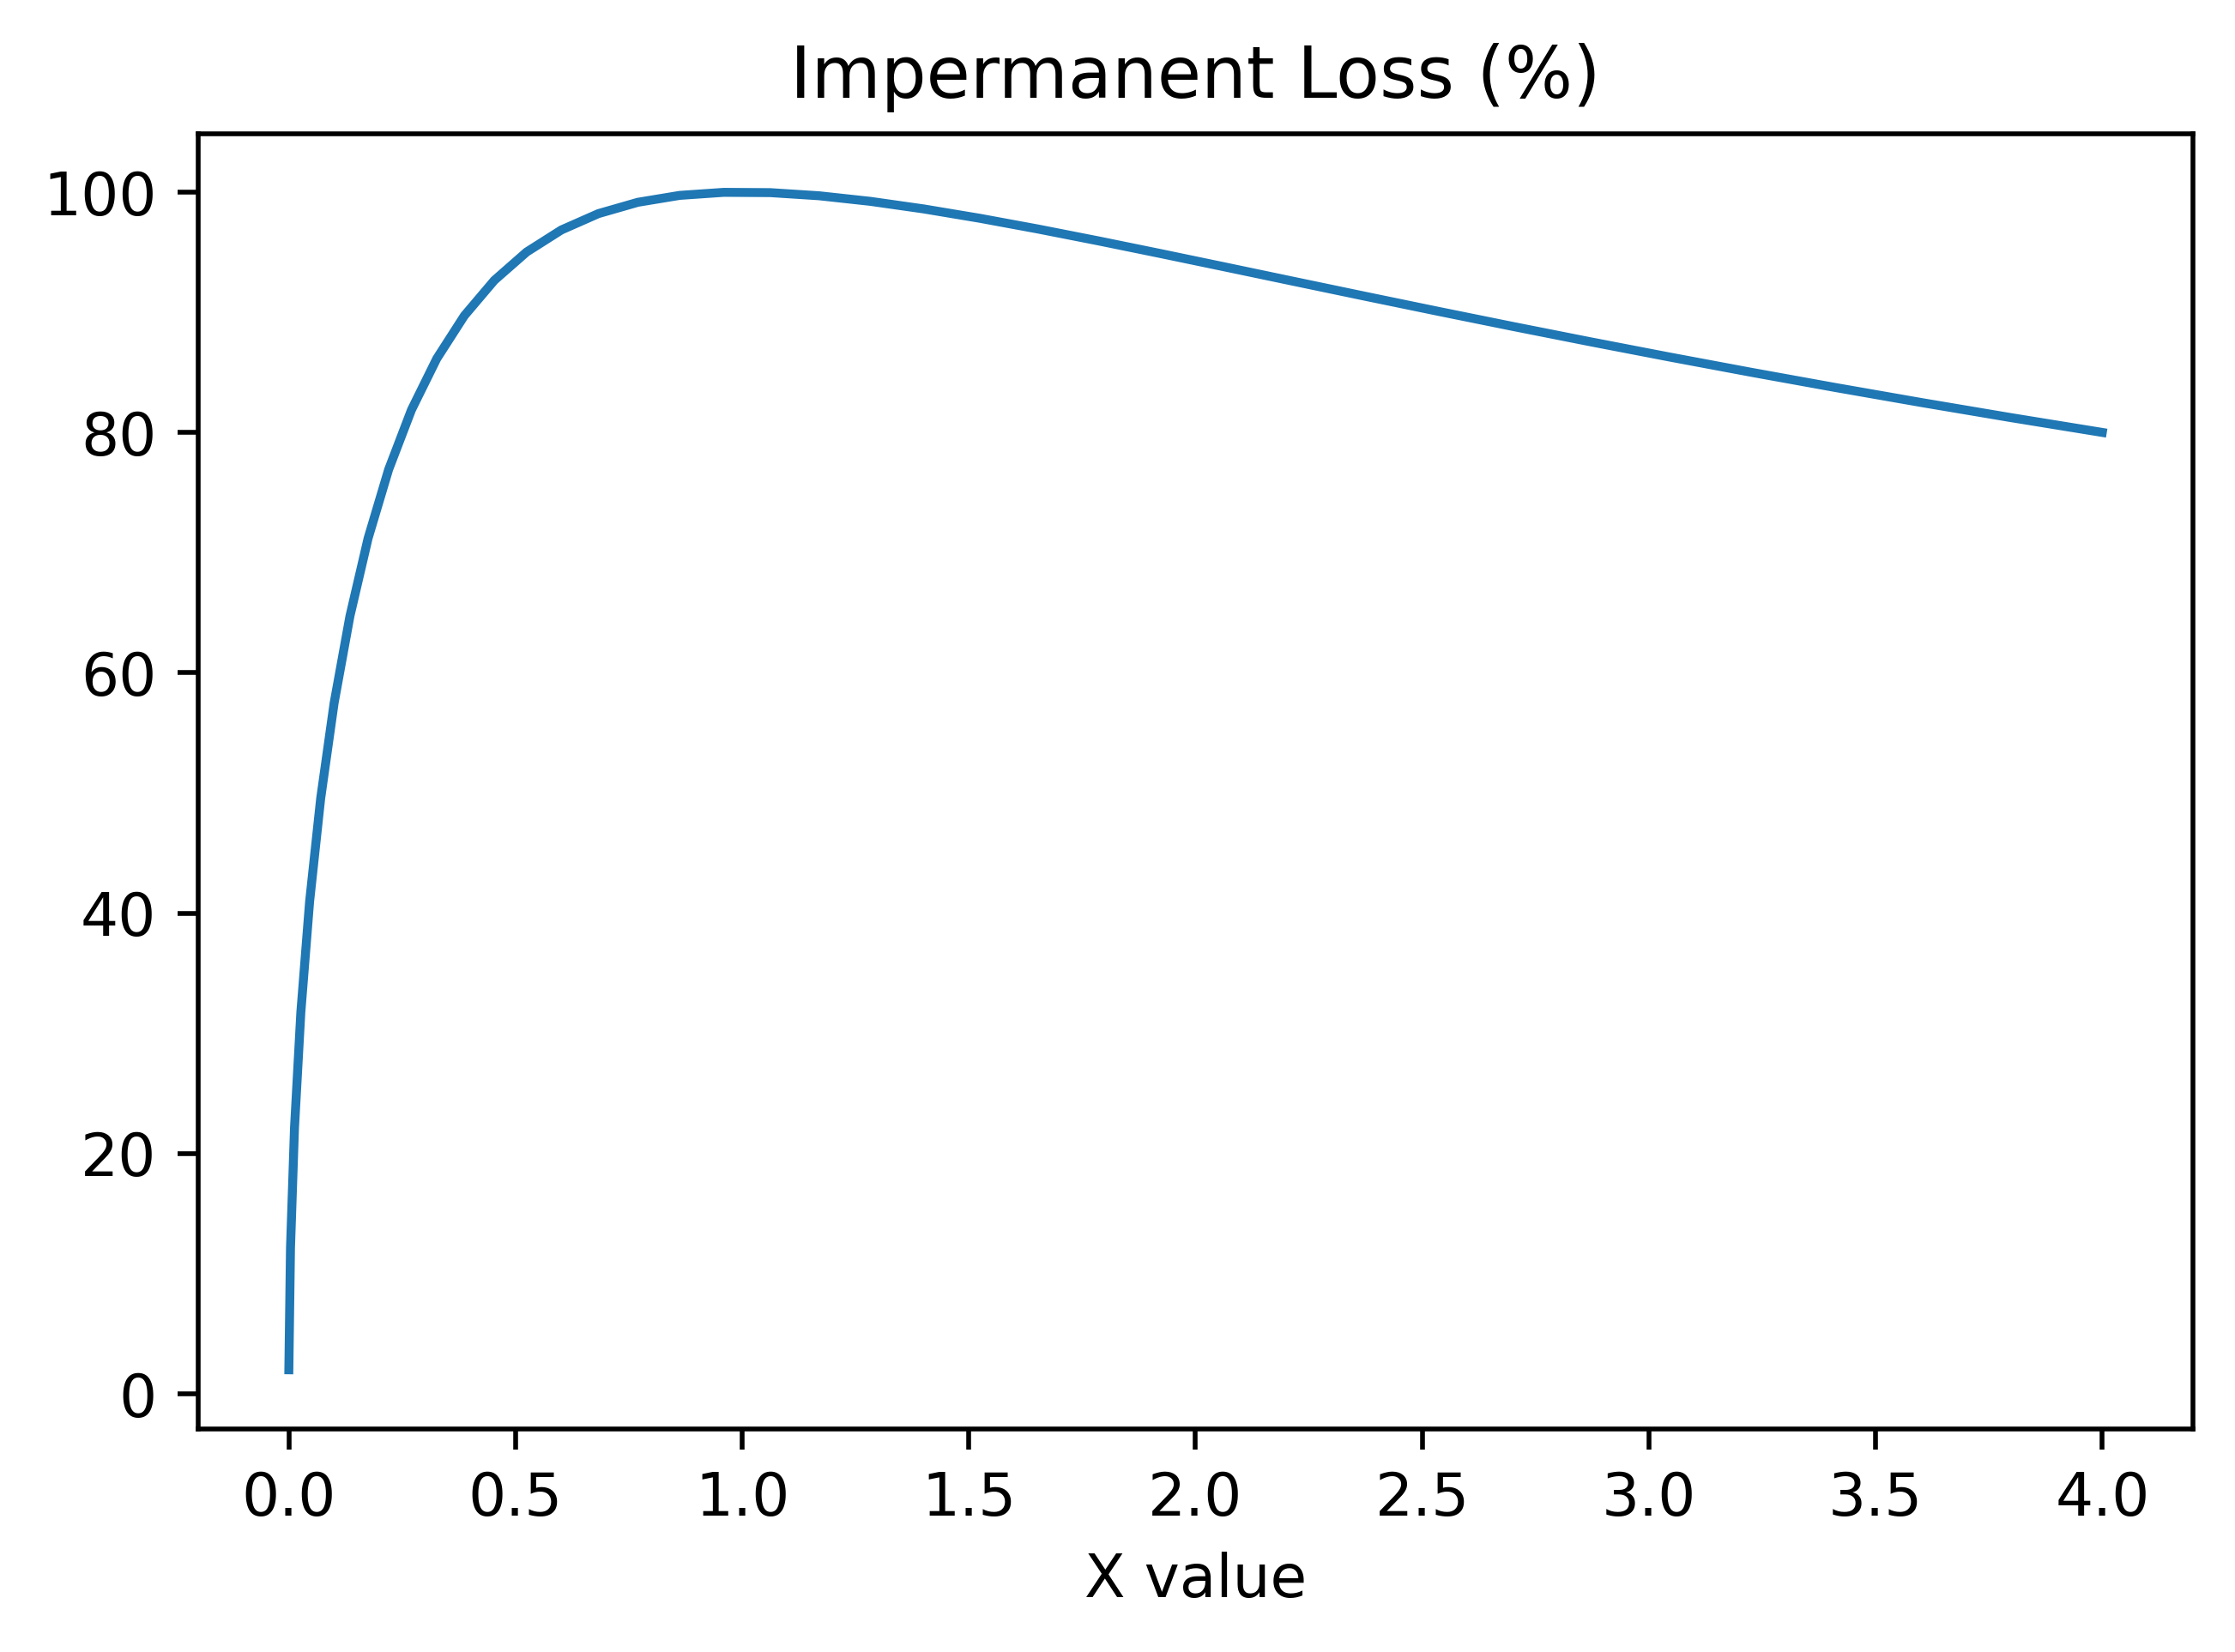

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 500
y0 = 100
x0 = 10
k = y0*x0
y = np.linspace(1,200,40)
imp_loss = 2*y*y0/(y0**2+y**2)
plt.plot(y**2/k/x0,imp_loss*100)
plt.title("Impermanent Loss (%)")
plt.xlabel("X value")
plt.show()

- \textbf{Market Risk}
If you use a Deposits & Borrow platform, like Compound or Aave, when your collateral is no longer sufficient to cover your loan amount due to the volatility of the borrowed assets or collateral, the automatic liquidation of the collateral will be triggered. You will be also imposed on a liquidation fee.

- \textbf{Smart Contract Risk}
The smart contract code is immutable and operates exactly as specified. However, for this reason, if a smart contract has man-made or non-man-made loopholes, it can be exploited without recourse. The contract cannot be guaranteed to be 100% safe even if the contract code is audited. Such risks must be taken into account when considering investments on yield farming.